In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [58]:
import mysql.connector
conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='',
        database='taxdatabase'
    )
if conn.is_connected():
    cursor = conn.cursor()
    query = "SELECT * FROM st_data_top_cities_ok"
    cursor.execute(query)
    rows = cursor.fetchall()
    for row in rows:
            print(row)
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(rows, columns=columns)

('OK', 'BROKEN ARROW ', 201604, 7204, 1000, Decimal('0.030000000'), Decimal('115552860.70'), Decimal('3466585.82'))
('OK', 'EDMOND', 201604, 5507, 1000, Decimal('0.037500000'), Decimal('142282349.90'), Decimal('5335588.12'))
('OK', 'ENID', 201604, 2411, 1000, Decimal('0.035000000'), Decimal('68103227.14'), Decimal('2383612.95'))
('OK', 'LAWTON', 201604, 1621, 1000, Decimal('0.041250000'), Decimal('91392282.67'), Decimal('3769931.66'))
('OK', 'MIDWEST CITY', 201604, 5522, 1000, Decimal('0.038500000'), Decimal('71197995.84'), Decimal('2741122.84'))
('OK', 'MOORE', 201604, 1404, 1000, Decimal('0.037500000'), Decimal('72053936.80'), Decimal('2702022.63'))
('OK', 'NORMAN', 201604, 1411, 1000, Decimal('0.037437981'), Decimal('161173084.50'), Decimal('6446923.38'))
('OK', 'OKLAHOMA CITY ', 201604, 5521, 1000, Decimal('0.038750000'), Decimal('900332521.80'), Decimal('34887885.22'))
('OK', 'OWASSO ', 201604, 7214, 1000, Decimal('0.035000000'), Decimal('68322915.14'), Decimal('2391302.03'))
('OK

In [59]:
df.tail()

,STATE,CITY,RPT_DT,COPO,NAICS_CD,TAX_RATE,GROSS_SALES,TAX_REVENUE
855,OK,MOORE,202305,1404,1000,0.038750000,103274437.20,4001884.44
856,OK,NORMAN,202305,1411,1000,0.041250000,192972748.60,7960125.88
857,OK,OKLAHOMA CITY,202305,5521,1000,0.041250000,1166475398.00,48117110.16
858,OK,OWASSO,202305,7214,1000,0.040500000,94132994.81,3812386.29
859,OK,TULSA,202305,7281,1000,0.036500000,777813886.60,28390206.86


In [60]:
df = df.drop(columns=['STATE', 'GROSS_SALES','COPO','NAICS_CD','TAX_RATE'])
df.tail()


,CITY,RPT_DT,TAX_REVENUE
855,MOORE,202305,4001884.44
856,NORMAN,202305,7960125.88
857,OKLAHOMA CITY,202305,48117110.16
858,OWASSO,202305,3812386.29
859,TULSA,202305,28390206.86


In [61]:
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], format='%Y%m')
print(df.dtypes)
df.set_index("RPT_DT")
df['TAX_REVENUE'] = pd.to_numeric(df['TAX_REVENUE'], errors='coerce')

CITY                   object
RPT_DT         datetime64[ns]
TAX_REVENUE            object
dtype: object


In [62]:
unique_categories = df['CITY'].unique()
unique_categories
palette = iter(sns.husl_palette(len(unique_categories)))
print(unique_categories)

['BROKEN ARROW ' 'EDMOND' 'ENID' 'LAWTON' 'MIDWEST CITY' 'MOORE' 'NORMAN'
 'OKLAHOMA CITY ' 'OWASSO ' 'TULSA ']


In [63]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

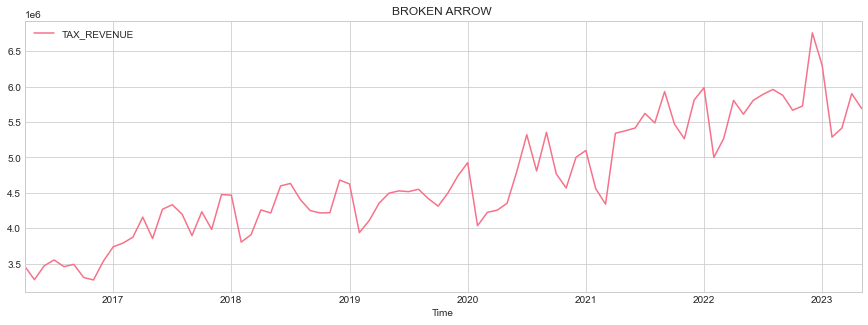

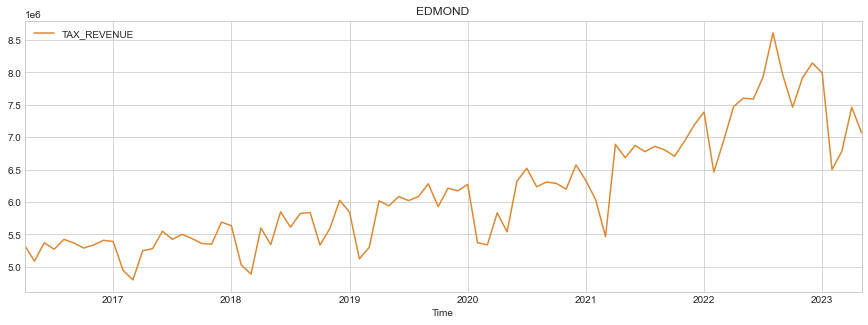

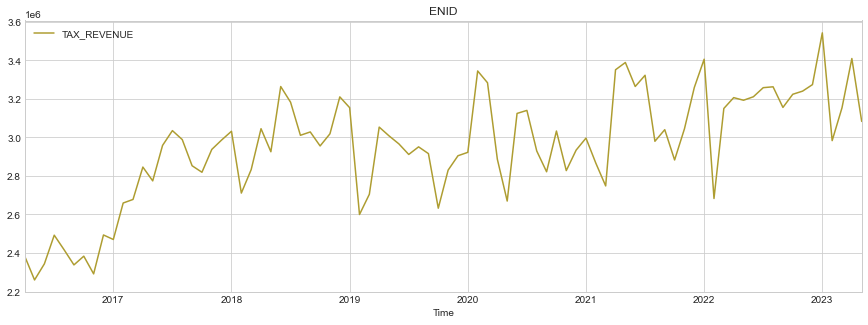

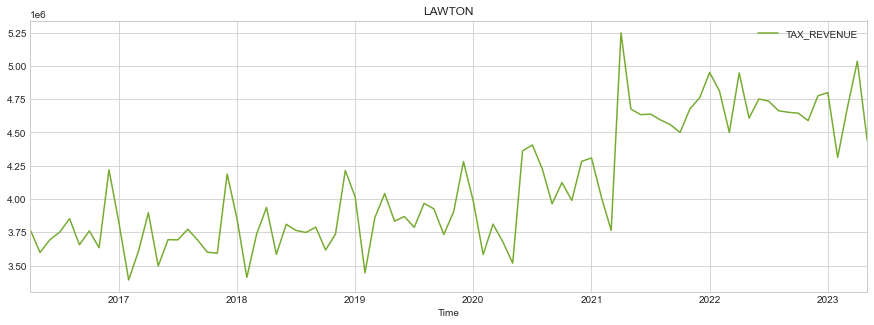

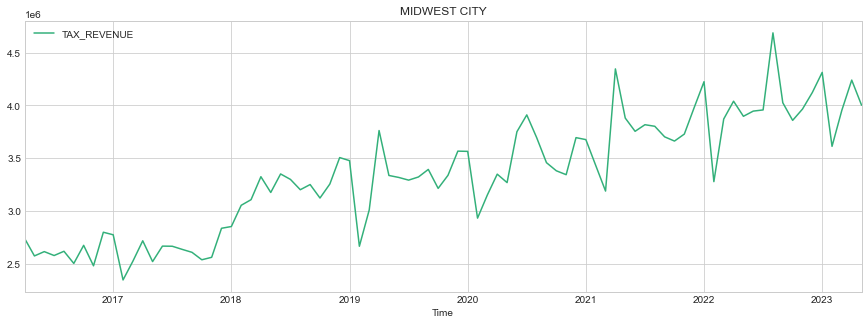

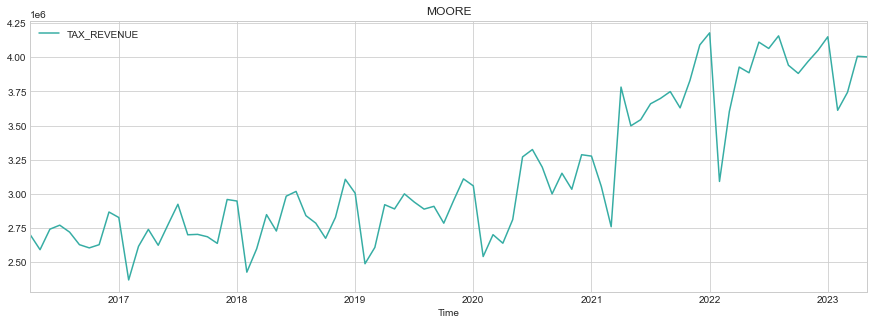

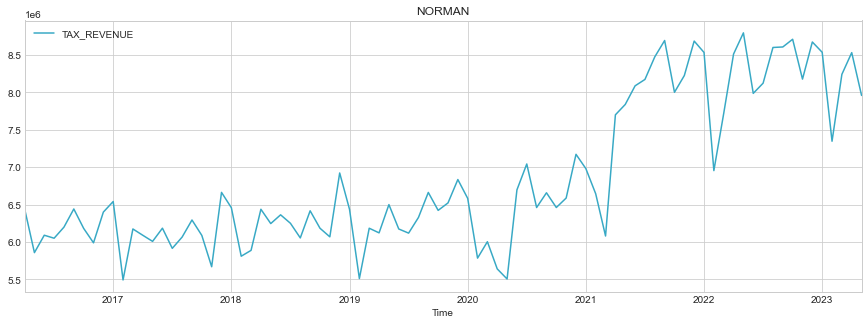

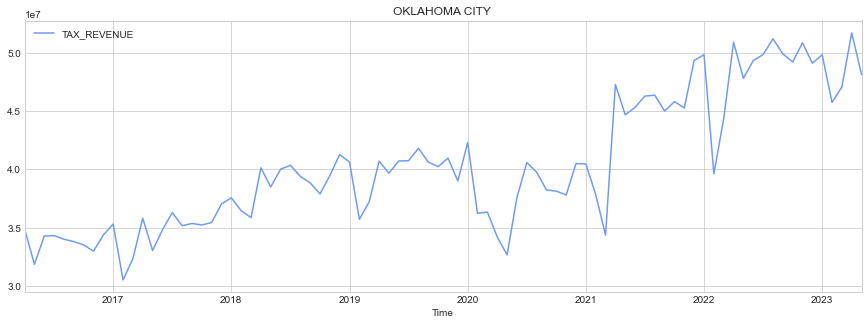

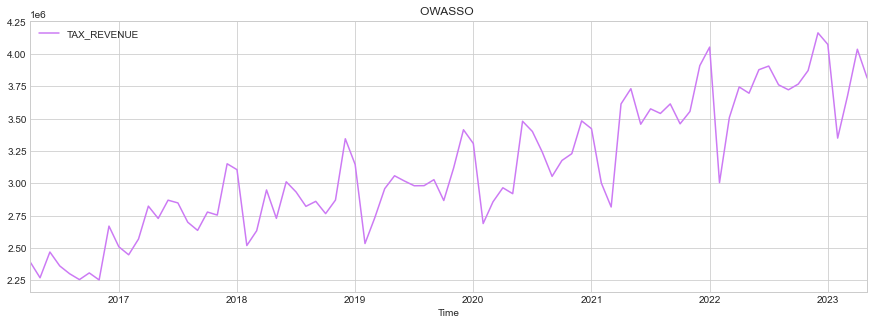

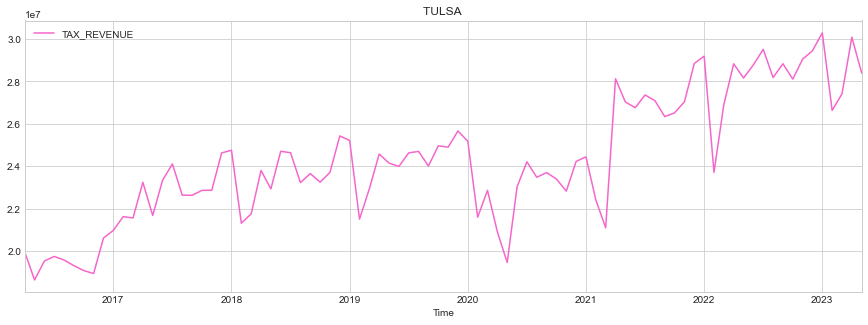

In [64]:
filtered_df= {}
for i in unique_categories:
    filtered_df1 = df[(df['CITY'] == i)]
    filtered_df[i] = (filtered_df1)
    filtered_df1.plot(x="RPT_DT",y="TAX_REVENUE",title = i,color=next(palette),figsize=(15,5),xlabel='Time')

In [65]:

for i in unique_categories:
    filtered_df[i].set_index("RPT_DT",inplace=True, drop=True)
    filtered_df[i] = filtered_df[i].drop(columns=['CITY'])
    filtered_df[i].index


BROKEN ARROW 
EDMOND
ENID
LAWTON
MIDWEST CITY
MOORE
NORMAN
OKLAHOMA CITY 
OWASSO 
TULSA 


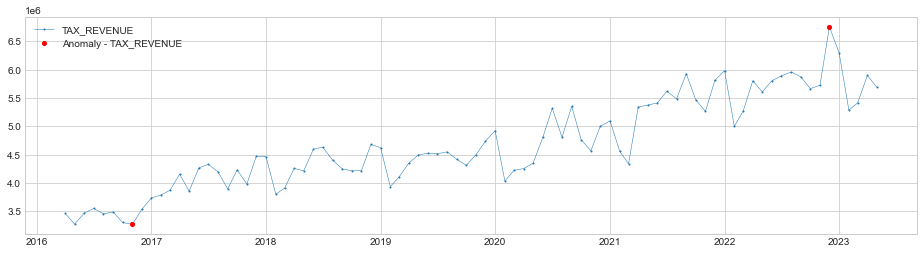

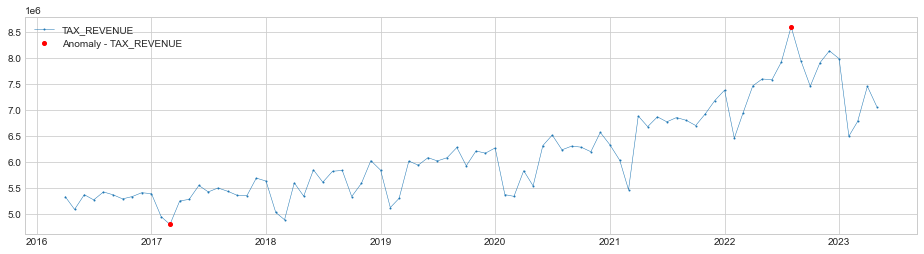

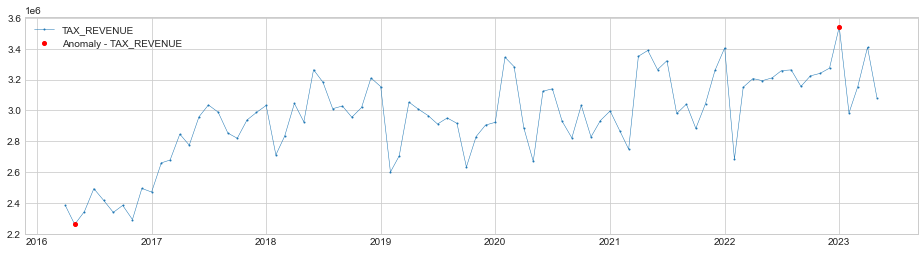

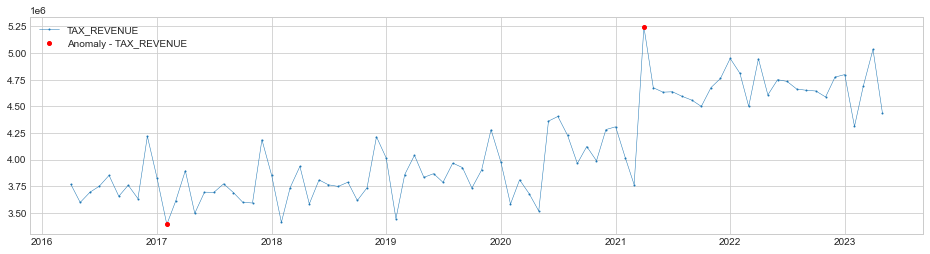

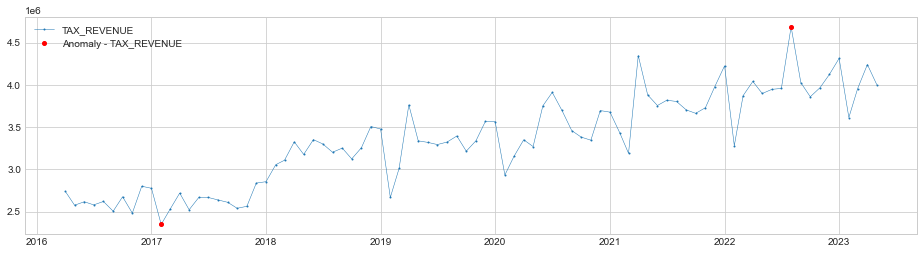

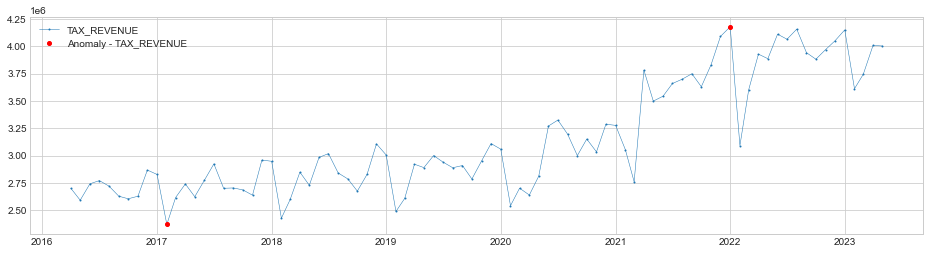

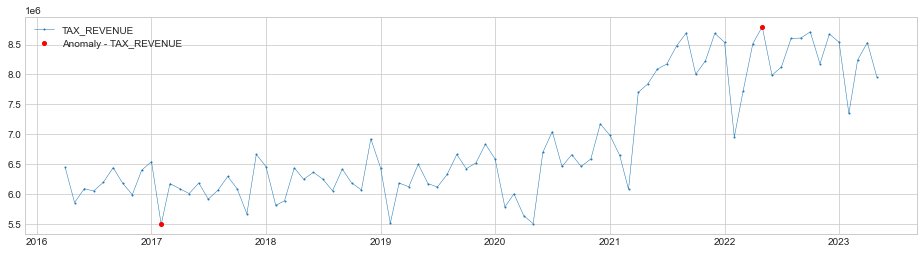

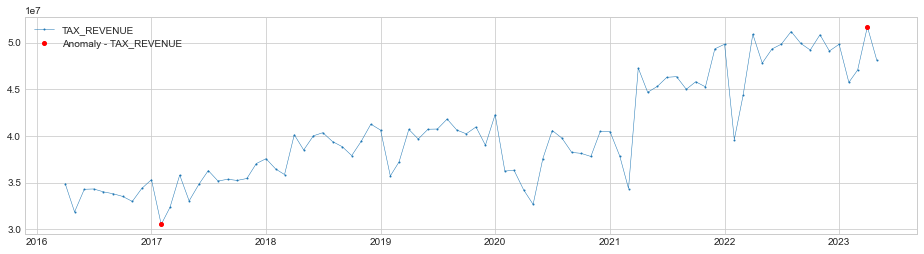

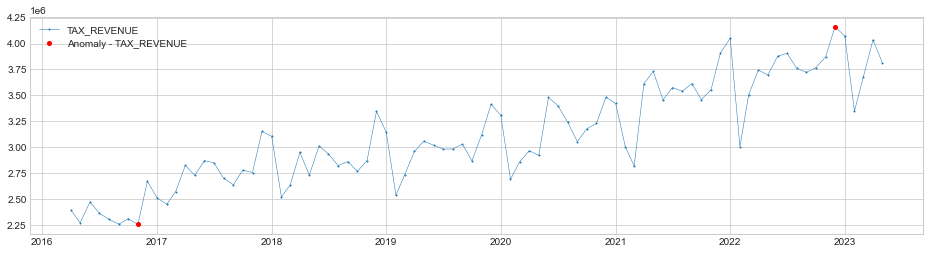

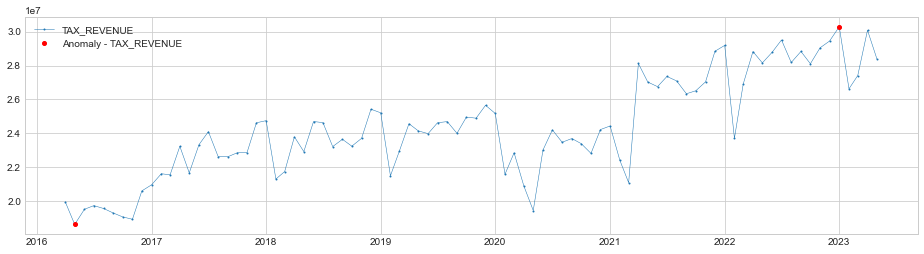

In [66]:
 for i in unique_categories:
    threshold_detector =QuantileAD(low=0.01,high=0.99)
    anamolies = threshold_detector.fit_detect(filtered_df[i])
    print(i)
    plot(filtered_df[i],anomaly= anamolies,anomaly_color='red',anomaly_tag='marker')
    

In [67]:
import datetime
d1 = datetime.datetime(2021, 5, 1)
train = {}
test = {}
for i in unique_categories:
        train[i] = filtered_df[i].loc[filtered_df[i].index < '2021-05-01']
        test[i] = filtered_df[i].loc[filtered_df[i].index >= '2021-05-01']

In [68]:
def create_features(df):
     df['year'] = df.index.year
     df['month'] = df.index.month
     return df


In [69]:
for i in unique_categories:
    train[i] = create_features(train[i])
    test[i] = create_features(test[i])
Features = ['year','month']
Target = ['TAX_REVENUE']

C:\Users\Ankit\AppData\Local\Temp\ipykernel_780\852918042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
C:\Users\Ankit\AppData\Local\Temp\ipykernel_780\852918042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\Ankit\AppData\Local\Temp\ipykernel_780\852918042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [70]:
X_train = {}
Y_train = {}
X_test = {}
Y_test = {}
for i in unique_categories:
    temp = train[i]
    temp1 = test[i]
    X_train[i] = temp[Features]
    X_test[i] = temp1[Features]
    Y_train[i] = train[i][Target]
    Y_test[i] = test[i][Target]

In [71]:
reg = {}
for i in unique_categories:
     print (" For " ,i )
     reg[i] = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
     reg[i].fit(X_train[i],Y_train[i],eval_set = [(X_train[i],Y_train[i]),(X_test[i],Y_test[i])],verbose = True)

 For  BROKEN ARROW 
[0]	validation_0-rmse:390597.86123	validation_1-rmse:1317251.95007
[1]	validation_0-rmse:309973.66928	validation_1-rmse:1210551.14310
[2]	validation_0-rmse:250086.83439	validation_1-rmse:1127624.88804
[3]	validation_0-rmse:208500.14847	validation_1-rmse:1064640.34803
[4]	validation_0-rmse:174152.29184	validation_1-rmse:1010239.97429
[5]	validation_0-rmse:147460.92399	validation_1-rmse:948666.31481
[6]	validation_0-rmse:127908.02700	validation_1-rmse:897382.50480
[7]	validation_0-rmse:111414.30357	validation_1-rmse:854691.05062
[8]	validation_0-rmse:99909.42165	validation_1-rmse:819156.31804
[9]	validation_0-rmse:87541.26980	validation_1-rmse:789569.83010
[10]	validation_0-rmse:77264.98617	validation_1-rmse:764920.43927
[11]	validation_0-rmse:67122.31514	validation_1-rmse:744365.20332
[12]	validation_0-rmse:58927.89573	validation_1-rmse:732045.76440
[13]	validation_0-rmse:54232.25443	validation_1-rmse:716837.50719
[14]	validation_0-rmse:47965.96522	validation_1-rmse:

[127]	validation_0-rmse:12.40179	validation_1-rmse:641374.52727
[128]	validation_0-rmse:12.06123	validation_1-rmse:641374.19088
[129]	validation_0-rmse:10.92490	validation_1-rmse:641374.24284
[130]	validation_0-rmse:10.58247	validation_1-rmse:641374.01545
[131]	validation_0-rmse:10.28029	validation_1-rmse:641373.91393
[132]	validation_0-rmse:9.63196	validation_1-rmse:641374.02390
[133]	validation_0-rmse:9.36613	validation_1-rmse:641374.03899
[134]	validation_0-rmse:9.17152	validation_1-rmse:641373.94539
[135]	validation_0-rmse:8.25062	validation_1-rmse:641373.79934
[136]	validation_0-rmse:7.41060	validation_1-rmse:641373.89916
[137]	validation_0-rmse:6.77084	validation_1-rmse:641373.97369
[138]	validation_0-rmse:6.24762	validation_1-rmse:641374.00121
[139]	validation_0-rmse:6.14160	validation_1-rmse:641374.06661
[140]	validation_0-rmse:5.63189	validation_1-rmse:641373.98378
[141]	validation_0-rmse:5.19349	validation_1-rmse:641373.89699
[142]	validation_0-rmse:4.96473	validation_1-rmse:

[13]	validation_0-rmse:50294.44244	validation_1-rmse:210638.51480
[14]	validation_0-rmse:48922.91230	validation_1-rmse:210200.85320
[15]	validation_0-rmse:42793.24164	validation_1-rmse:211963.10331
[16]	validation_0-rmse:38607.17471	validation_1-rmse:212599.45783
[17]	validation_0-rmse:35606.67878	validation_1-rmse:213473.17249
[18]	validation_0-rmse:33239.89416	validation_1-rmse:212788.78129
[19]	validation_0-rmse:31320.44407	validation_1-rmse:213653.50290
[20]	validation_0-rmse:27994.66183	validation_1-rmse:213731.65748
[21]	validation_0-rmse:25803.35641	validation_1-rmse:215293.51071
[22]	validation_0-rmse:23353.31418	validation_1-rmse:217267.33353
[23]	validation_0-rmse:22248.48110	validation_1-rmse:218400.09548
[24]	validation_0-rmse:21400.00506	validation_1-rmse:219365.86049
[25]	validation_0-rmse:20145.81555	validation_1-rmse:220378.27370
[26]	validation_0-rmse:19111.06355	validation_1-rmse:220495.53672
[27]	validation_0-rmse:17701.76356	validation_1-rmse:221410.99794
[28]	valid

[25]	validation_0-rmse:26760.44089	validation_1-rmse:448063.60643
[26]	validation_0-rmse:23935.63467	validation_1-rmse:449676.49814
[27]	validation_0-rmse:21730.79165	validation_1-rmse:451054.75306
[28]	validation_0-rmse:20058.55419	validation_1-rmse:452231.57365
[29]	validation_0-rmse:17247.13168	validation_1-rmse:452464.01425
[30]	validation_0-rmse:15340.24547	validation_1-rmse:452535.25583
[31]	validation_0-rmse:13603.22460	validation_1-rmse:452675.24998
[32]	validation_0-rmse:12528.50583	validation_1-rmse:452266.92701
[33]	validation_0-rmse:11168.77481	validation_1-rmse:452872.29121
[34]	validation_0-rmse:10065.69684	validation_1-rmse:453333.09701
[35]	validation_0-rmse:9234.54998	validation_1-rmse:453728.89322
[36]	validation_0-rmse:8524.46630	validation_1-rmse:454068.13427
[37]	validation_0-rmse:7596.54566	validation_1-rmse:454358.62910
[38]	validation_0-rmse:6631.55421	validation_1-rmse:454568.83475
[39]	validation_0-rmse:6033.46768	validation_1-rmse:454781.65633
[40]	validation

[92]	validation_0-rmse:201.41029	validation_1-rmse:422069.80584
[93]	validation_0-rmse:193.44284	validation_1-rmse:422068.02902
[94]	validation_0-rmse:177.52737	validation_1-rmse:422068.29335
 For  NORMAN
[0]	validation_0-rmse:335313.15076	validation_1-rmse:1837662.13875
[1]	validation_0-rmse:279828.64927	validation_1-rmse:1691662.50841
[2]	validation_0-rmse:239065.22482	validation_1-rmse:1570320.56020
[3]	validation_0-rmse:209964.16643	validation_1-rmse:1469597.85633
[4]	validation_0-rmse:186155.07054	validation_1-rmse:1385719.25776
[5]	validation_0-rmse:169728.98691	validation_1-rmse:1315918.44747
[6]	validation_0-rmse:155337.52403	validation_1-rmse:1257850.86436
[7]	validation_0-rmse:142143.63881	validation_1-rmse:1209538.39996
[8]	validation_0-rmse:127434.60382	validation_1-rmse:1169322.70092
[9]	validation_0-rmse:116903.62318	validation_1-rmse:1135819.04940
[10]	validation_0-rmse:111068.80130	validation_1-rmse:1107877.17794
[11]	validation_0-rmse:105838.03031	validation_1-rmse:108

[19]	validation_0-rmse:264199.27527	validation_1-rmse:5048448.72478
[20]	validation_0-rmse:252064.12277	validation_1-rmse:5045163.23793
[21]	validation_0-rmse:243305.71533	validation_1-rmse:5044543.73869
[22]	validation_0-rmse:209280.22112	validation_1-rmse:5039479.19104
[23]	validation_0-rmse:193223.69778	validation_1-rmse:5035807.96857
[24]	validation_0-rmse:178827.22886	validation_1-rmse:5034208.30250
[25]	validation_0-rmse:168774.16089	validation_1-rmse:5035498.99344
[26]	validation_0-rmse:161419.93765	validation_1-rmse:5033584.03560
[27]	validation_0-rmse:150943.12967	validation_1-rmse:5033326.12170
[28]	validation_0-rmse:146154.60547	validation_1-rmse:5034730.29345
[29]	validation_0-rmse:138856.28603	validation_1-rmse:5031635.28075
[30]	validation_0-rmse:131481.16089	validation_1-rmse:5029102.15979
[31]	validation_0-rmse:121878.53504	validation_1-rmse:5027023.38121
[32]	validation_0-rmse:116786.25918	validation_1-rmse:5026465.13399
[33]	validation_0-rmse:100394.39995	validation_1

[143]	validation_0-rmse:41.38266	validation_1-rmse:5026234.75266
[144]	validation_0-rmse:38.40253	validation_1-rmse:5026233.89164
[145]	validation_0-rmse:34.81191	validation_1-rmse:5026233.96290
[146]	validation_0-rmse:31.38967	validation_1-rmse:5026234.22556
[147]	validation_0-rmse:30.18522	validation_1-rmse:5026233.35620
[148]	validation_0-rmse:27.90147	validation_1-rmse:5026233.55172
[149]	validation_0-rmse:26.07304	validation_1-rmse:5026233.85435
[150]	validation_0-rmse:24.43861	validation_1-rmse:5026233.99373
[151]	validation_0-rmse:23.11199	validation_1-rmse:5026234.21820
[152]	validation_0-rmse:22.01788	validation_1-rmse:5026234.44233
[153]	validation_0-rmse:21.34033	validation_1-rmse:5026234.44233
[154]	validation_0-rmse:20.76093	validation_1-rmse:5026234.44233
[155]	validation_0-rmse:20.49870	validation_1-rmse:5026233.69847
[156]	validation_0-rmse:19.68773	validation_1-rmse:5026232.95976
[157]	validation_0-rmse:17.84083	validation_1-rmse:5026233.09790
[158]	validation_0-rmse:1

[62]	validation_0-rmse:1250.31986	validation_1-rmse:364119.94112
[63]	validation_0-rmse:1122.03890	validation_1-rmse:364139.66782
[64]	validation_0-rmse:1050.32550	validation_1-rmse:364132.96324
[65]	validation_0-rmse:951.33055	validation_1-rmse:364150.99584
[66]	validation_0-rmse:876.34894	validation_1-rmse:364154.17323
[67]	validation_0-rmse:807.92630	validation_1-rmse:364161.90679
[68]	validation_0-rmse:740.97534	validation_1-rmse:364167.08673
[69]	validation_0-rmse:706.20692	validation_1-rmse:364167.41253
[70]	validation_0-rmse:680.75840	validation_1-rmse:364167.26343
[71]	validation_0-rmse:659.13915	validation_1-rmse:364172.23207
[72]	validation_0-rmse:650.78394	validation_1-rmse:364175.32800
[73]	validation_0-rmse:577.94492	validation_1-rmse:364171.36535
[74]	validation_0-rmse:541.32352	validation_1-rmse:364181.67533
[75]	validation_0-rmse:536.15860	validation_1-rmse:364181.41059
[76]	validation_0-rmse:490.63461	validation_1-rmse:364187.68828
[77]	validation_0-rmse:433.93262	vali

In [72]:
for i in unique_categories:
    adf = {'year':[2023],'month':[6]}
    sdf = pd.DataFrame(adf) 
    outcome =reg[i].predict(sdf)
    print ("For ",i,"The forecasting is " ,outcome)

For  BROKEN ARROW  The forecasting is  [5381515.]
For  EDMOND The forecasting is  [6857526.5]
For  ENID The forecasting is  [3186749.8]
For  LAWTON The forecasting is  [4724570.]
For  MIDWEST CITY The forecasting is  [4031951.5]
For  MOORE The forecasting is  [3775569.]
For  NORMAN The forecasting is  [7603073.5]
For  OKLAHOMA CITY  The forecasting is  [46600292.]
For  OWASSO  The forecasting is  [3592914.]
For  TULSA  The forecasting is  [25606748.]


In [73]:
test['TULSA ']

,TAX_REVENUE,year,month
RPT_DT,,,
2021-05-01,27027678.46,2021,5
2021-06-01,26758438.88,2021,6
2021-07-01,27359057.21,2021,7
2021-08-01,27091544.15,2021,8
2021-09-01,26338089.26,2021,9
2021-10-01,26515409.87,2021,10
2021-11-01,27040674.76,2021,11
2021-12-01,28843620.43,2021,12
2022-01-01,29187743.16,2022,1


In [74]:
reg['TULSA '].predict(X_test['TULSA '])

array([26321140., 25606748., 25879118., 25800580., 25800580., 25800580.,
       25629012., 25529796., 24435988., 22154946., 21650250., 27369548.,
       26321140., 25606748., 25879118., 25800580., 25800580., 25800580.,
       25629012., 25529796., 24435988., 22154946., 21650250., 27369548.,
       26321140.], dtype=float32)

NameError: name 'train' is not defined

In [172]:
#Y_train['TULSA '] = train['TULSA '][Target]

In [179]:
#df.index.dt.month
# df['RPT_DT'].dt.month

NameError: name 'x_train' is not defined